웹파이썬 프로그래밍 텀 프로젝트 최종 보고서 
========
                                                       2021104964 조수현

## 주제
서울시의 인터넷 쇼핑몰에 대한 분석

서울특별시에서 제공하는 데이터와 실제 시장에서의 관련성에 대한 의문이 들었다. 평가의 요소들은 경영학적 측면에서도 소비에 영향을 크게 미친다고 하는 부분들이었다. 따라서 서울시의 평가가 신뢰성이 있다는 가정 하에, 흥하는 쇼핑몰은 전체 평가 점수가 높을 것이라는 예상이 과연 맞는 지가 궁금했다. 



## 가설 정의
##### 1. 종합쇼핑몰 분류의 쇼핑몰들은 전체 평가 점수가 높을 것이다.
대기업에서 운영하는 것이 많아 세세한 규정을 갖추어 소비자 보호평가와 피해 발생평가 영역의 점수가 높아 전체 점수에서도 우수할 것이다.
##### 2. 해외구매대행 분류의 쇼핑몰들은 전체 평가 점수가 낮을 것이다.
크게 만족감을 주기는 힘든데 무언가 잘못된다면 많은 실망감을 안겨줄 수 있는 영역이라고 생각한다. 
##### 3. 최근에 평가된 쇼핑몰들의 전체 평가 점수가 높을 것이다.
최근에 소비자 보호와 관련해서 다들 더더욱 힘쓰고 있는 것 같다. 
##### 4. 이용자 만족평가의 점수가 높으면 다른 영역에서도 평가 점수가 높을 것이다.
결국 실제로 가장 중요한 이용도의 만족도가 높으면 다른 부분에서도 모두 좋은 점수를 받았을 것으로 예상된다.
##### 5. 피해발생 평가가 낮은 쇼핑몰들은 모두 매우 낮은 점수를 받았을 것이다.
몇 없는 소비자에게 피해를 준 쇼핑몰들이다. 기본이 되지 않았을 것이기에 다른 영역에서도 점수가 높을 수 없을 것 같다.


## 데이터 획득
- 데이터의 출처: 서울 열린데이터 광장(https://data.seoul.go.kr/dataList/OA-21171/S/1/datasetView.do)
- 데이터의 내용:
    소비자들이 자주 이용하는 인터넷 쇼핑몰 100개 업체를 대상으로 매년 결과를 발표하는 소비자지향적 인터넷 쇼핑몰 평가를 나열한 데이터이다. 평가기준은 청약철회 가능여부, 구매안전장치 제공 여부, 초기화면 표시 필수항목 등 [전자상거래등에서의 소비자보호에관한법률]에서 요구하는 소비자보호평가 이행 여부 50점, 소비자서비스, 쇼핑의 편의성, 제품정보, 속도 등 실제 쇼핑몰을 이용한 소비자들의 이용만족평가 40점, 서울시전자상거래센터에 접수된 피해발생평가를 10점으로 해서 100점 기준으로 환산한 결과이다.

- 서울 열린데이터 광장에서 해당 데이터의 csv 파일을 직접 다운로드할 수 있었다. 


## 분석을 위한 데이터의 가공
pandas를 통해 서울 열린데이터 광장에서 다운받은 csv파일을 분석한다. 분류에 따른 각 분야 점수별 평균을 나타내어 본다. 각 분야 점수 간 상관관계를 알아본다. 가설에 적은 4가지를 우선적으로 분석한다.

- 모든 평가에서 0점을 받은 세 개 쇼핑몰을 제외한다. 

- 공정성과 편의를 위해 '연번', '쇼핑몰 명', '도메인명'은 삭제했다. 


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("./서울시 인터넷 쇼핑몰 100개 평가 정보2.csv")
drop1 = df.drop(['연번'], axis = 1)
drop2 = drop1.drop(['쇼핑몰 명'], axis = 1)
drop3 = drop2.drop(['도메인명'], axis = 1)
drop_sort = drop3.sort_values(by='피해발생평가')
mall = drop_sort.tail(1496)
mall

,평가년도,쇼핑몰 구분,소비자보호평가,이용자만족평가,피해발생평가,전체평가
189,2020,종합쇼핑몰,46.0,27.40,4.0,77.40
90,2021,가전,48.0,26.82,4.0,78.82
92,2021,종합쇼핑몰,47.0,26.87,4.0,77.87
73,2021,의류,48.0,27.18,5.0,80.18
183,2020,의류,47.0,25.26,6.0,78.26
...,...,...,...,...,...,...
510,2016,식품,47.0,28.68,10.0,85.68
509,2016,종합쇼핑몰,49.0,26.72,10.0,85.72
508,2016,도서,47.0,28.81,10.0,85.81
531,2016,식품,46.0,27.51,10.0,83.51


In [25]:
mall.describe()

,평가년도,소비자보호평가,이용자만족평가,피해발생평가,전체평가
count,1496.000000,1496.000000,1496.000000,1496.000000,1496.000000
mean,2014.009358,44.895053,26.794358,9.821524,81.512941
std,4.323682,3.514568,1.459922,0.634223,4.017122
min,2007.000000,0.000000,20.000000,4.000000,35.000000
25%,2010.000000,44.000000,26.000000,10.000000,80.000000
50%,2014.000000,46.000000,27.000000,10.000000,82.110000
75%,2018.000000,47.000000,27.920000,10.000000,84.000000
max,2021.000000,49.000000,31.130000,10.000000,89.000000


정리된 쇼핑몰들의 데이터를 mall로 정의했다. 그에 따른 '소비자보호평가', '이용자만족평가', '피해발생평가', '전체평가'의 평균은 각각 '44.89'(만점 50점 중), '26.79'(만점 40점 중), '9.82'(만점 10점 중), '81.51'(만점 100점 중)이었다. 모든 데이터는 소수점 둘쨋자리까지 채용 후 이하 삭제하였다. 

 ## 분석 결과


##### 1. 종합쇼핑몰 분류의 쇼핑몰들은 전체 평가 점수가 높을 것이다.


In [3]:
hs1 = mall['쇼핑몰 구분'].str.contains("종합쇼핑몰", na=False)
hs1_2 = mall[hs1]
hs1_2

,평가년도,쇼핑몰 구분,소비자보호평가,이용자만족평가,피해발생평가,전체평가
189,2020,종합쇼핑몰,46.0,27.40,4.0,77.40
92,2021,종합쇼핑몰,47.0,26.87,4.0,77.87
72,2021,종합쇼핑몰,47.0,27.41,6.0,80.41
856,2013,종합쇼핑몰,47.0,28.00,7.0,82.00
854,2013,종합쇼핑몰,46.0,29.00,7.0,82.00
...,...,...,...,...,...,...
518,2016,종합쇼핑몰,47.0,27.87,10.0,84.87
517,2016,종합쇼핑몰,46.0,29.01,10.0,85.01
514,2016,종합쇼핑몰,48.0,27.29,10.0,85.29
513,2016,종합쇼핑몰,48.0,27.32,10.0,85.32


In [4]:
hs1_2.describe()

,평가년도,소비자보호평가,이용자만족평가,피해발생평가,전체평가
count,462.000000,462.000000,462.000000,462.000000,462.000000
mean,2012.772727,44.919913,26.915130,9.746753,81.583961
std,4.389678,3.423169,1.299591,0.750083,3.868169
min,2007.000000,31.000000,23.000000,4.000000,68.000000
25%,2009.000000,44.000000,26.000000,10.000000,80.000000
50%,2012.000000,46.000000,27.000000,10.000000,82.345000
75%,2016.750000,47.000000,27.997500,10.000000,84.052500
max,2021.000000,49.000000,30.290000,10.000000,88.290000


전체 평균인 81.51에 비해 종합쇼핑몰 분류의 쇼핑몰들의 전체평가 평균은 81.58로 높지만 그 차이가 많지 않다. 따라서 가설 '1. 종합쇼핑몰 분류의 쇼핑몰들은 전체 평가 점수가 높을 것이다.'은 기각되었다. 종합쇼핑몰 분류의 쇼핑몰은 모두 462개로 일반화하기에는 큰 수였던 것 같다. 


##### 2. 해외구매대행 분류의 쇼핑몰들은 전체 평가 점수가 낮을 것이다.

In [5]:
hs2 = mall['쇼핑몰 구분'].str.contains("해외구매대행", na=False)
hs2_2 = mall[hs2]
hs2_2

,평가년도,쇼핑몰 구분,소비자보호평가,이용자만족평가,피해발생평가,전체평가
1164,2010,해외구매대행,47.0,26.00,7.0,80.00
399,2018,해외구매대행,42.0,26.93,7.0,75.93
957,2012,해외구매대행,48.0,27.00,7.0,82.00
589,2016,해외구매대행,44.0,27.23,7.0,78.23
980,2012,해외구매대행,47.0,25.00,7.0,79.00
...,...,...,...,...,...,...
393,2018,해외구매대행,42.0,26.83,10.0,78.83
390,2018,해외구매대행,44.0,25.10,10.0,79.10
586,2016,해외구매대행,42.0,27.32,10.0,79.32
497,2017,해외구매대행,38.0,27.17,10.0,75.17


In [6]:
hs2_2.describe()

,평가년도,소비자보호평가,이용자만족평가,피해발생평가,전체평가
count,73.000000,73.000000,73.000000,73.000000,73.000000
mean,2013.808219,42.671233,25.705205,9.616438,77.992877
std,4.248063,6.103402,1.328348,0.891786,6.345257
min,2007.000000,0.000000,22.480000,7.000000,35.000000
25%,2010.000000,41.000000,25.000000,10.000000,76.000000
50%,2014.000000,44.000000,26.000000,10.000000,79.000000
75%,2017.000000,46.000000,26.830000,10.000000,81.150000
max,2021.000000,48.000000,28.560000,10.000000,85.560000


전체 평균인 81.51에 비해 해외구매대행 분류의 쇼핑몰들의 전체평가 평균은 77.99로 유의미하게 낮다. 따라서 가설 '2. 해외구매대행 분류의 쇼핑몰들은 전체 평가 점수가 낮을 것이다.'는 상관관계가 있어 보인다. 

##### 3. 최근에 평가된 쇼핑몰들의 전체 평가 점수가 높을 것이다.


<BarContainer object of 1496 artists>

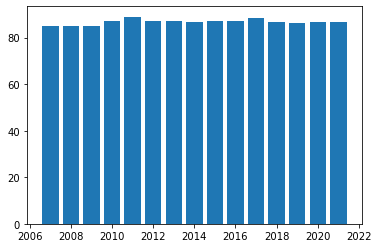

In [22]:
hs3 = mall.sort_values(by=['평가년도'])
plt.bar(hs3['평가년도'],hs3['전체평가'])

In [11]:
hs3_2 = hs3.groupby(hs3['평가년도'], as_index=False).mean()
hs3_2

,평가년도,소비자보호평가,이용자만족평가,피해발생평가,전체평가
0,2007,42.830000,26.320000,9.960000,79.110000
1,2008,41.950000,26.590000,9.780000,78.350000
2,2009,43.340000,27.120000,9.880000,80.340000
3,2010,44.876289,26.886598,9.824742,81.587629
4,2011,44.950000,26.970000,9.790000,81.710000
5,2012,44.626263,26.666667,9.717172,81.010101
6,2013,45.870000,26.750000,9.820000,82.440000
7,2014,46.060000,26.670700,9.910000,82.640700
8,2015,45.680000,26.828800,9.880000,82.388800
9,2016,45.210000,27.165100,9.650000,82.025100


'전체평가'에서는 지표상 평가년도에 따른 큰 의미를 발견하기는 어려웠다. 하지만 2007년과 2008년보다 2010년 이후에 '소비자보호평가'에서 평균이 올라간 후 일정 수준을 유지한다. 이는 소비자를 보호하는 법적 규정에 관련한 부문이다. 규정에 대한 인식이 증진되었음을 유추할 수 있다. 따라서 '3. 최근에 평가된 쇼핑몰들의 전체 평가 점수가 높을 것이다.'에서의 '평가년도'와 '전체평가' 점수는 상관관계가 있을 것으로 생각한다. 


##### 4. 이용자 만족평가의 점수가 높으면 다른 영역에서도 평가 점수가 높을 것이다.

In [14]:
hs4 = mall.sort_values(by=['이용자만족평가'])
hs4

,평가년도,쇼핑몰 구분,소비자보호평가,이용자만족평가,피해발생평가,전체평가
1297,2009,가전,40.0,20.00,10.0,70.00
1397,2008,오픈마켓,29.0,20.00,9.0,58.00
1498,2007,의류,34.0,21.00,10.0,65.00
1092,2011,소셜커머스,44.0,22.00,10.0,76.00
96,2021,소셜커머스,42.0,22.36,10.0,74.36
...,...,...,...,...,...,...
1000,2011,식품,46.0,31.00,10.0,87.00
801,2013,도서,46.0,31.00,10.0,87.00
999,2011,화장품,48.0,31.00,10.0,89.00
1056,2011,화장품,41.0,31.00,10.0,82.00


<BarContainer object of 1496 artists>

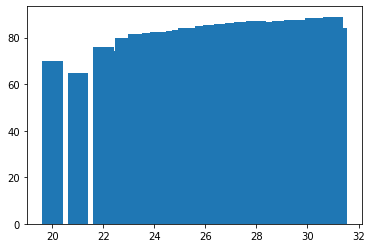

In [15]:
plt.bar(mall['이용자만족평가'],mall['전체평가'])

'이용자만족평가' 점수의 상승에 따른 '전체평가' 점수는 증가하고 있는 것을 그래프를 통해 알 수 있다. 이를 통해 '4. 이용자 만족평가의 점수가 높으면 다른 영역에서도 평가 점수가 높을 것이다.'를 증명할 수 있다. 

##### 5. 피해발생 평가가 낮은 쇼핑몰들은 모두 매우 낮은 점수를 받았을 것이다.

아래 그래프는 피해발생평가 점수 별 전체평가 점수를 나타낸 것이다.  전체평가 점수가 피해발생평가 점수와 함께 상승곡선을 그리는 것을 보아 그 상관관계를 유추할 수 있다. 

<BarContainer object of 1496 artists>

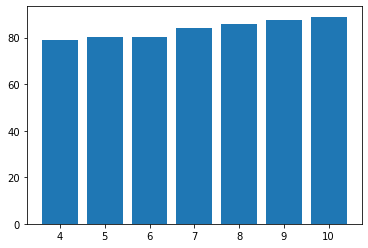

In [19]:
hs5 = mall.sort_values(by=['피해발생평가']).tail(1496)
plt.bar(hs5['피해발생평가'],hs5['전체평가'])

In [20]:
hs5.groupby(hs5['피해발생평가'], as_index=False).mean()

,피해발생평가,평가년도,소비자보호평가,이용자만족평가,전체평가
0,4.0,2020.666667,47.000000,27.030000,78.030000
1,5.0,2021.000000,48.000000,27.180000,80.180000
2,6.0,2020.500000,47.000000,26.335000,79.335000
3,7.0,2014.103448,46.241379,26.647931,79.889310
4,8.0,2014.351351,46.189189,27.146216,81.335405
5,9.0,2012.720000,45.333333,26.875200,81.221867
6,10.0,2014.040030,44.796145,26.783232,81.580860


피해발생평가 7점 이하인 쇼핑몰들의 정보다. 

In [21]:
hs5_2 = mall.sort_values(by=['피해발생평가']).head(35)
hs5_2.describe()

,평가년도,소비자보호평가,이용자만족평가,피해발생평가,전체평가
count,35.000000,35.000000,35.000000,35.000000,35.000000
mean,2015.228571,46.400000,26.678000,6.628571,79.706571
std,4.166291,1.912805,1.455755,0.910259,2.602199
min,2008.000000,41.000000,23.000000,4.000000,72.000000
25%,2012.000000,46.000000,25.885000,7.000000,78.245000
50%,2016.000000,47.000000,26.930000,7.000000,80.000000
75%,2019.000000,48.000000,27.755000,7.000000,81.925000
max,2021.000000,49.000000,29.000000,7.000000,84.000000


피해발생평가에서 7점 이하를 받은 쇼핑몰들의 전체평가 평균은 약 79.70으로, 모든 평가 항목에서 0점을 받은 쇼핑몰 세 곳을 제외한 모든 쇼핑몰들의 평균인 81.51보다 유의미하게 낮은 수치를 보였다. 따라서 가설 '5. 피해발생 평가가 낮은 쇼핑몰들은 모두 매우 낮은 점수를 받았을 것이다.'는 성립한다고 볼 수 있다.


## 결론
서울특별시에서 제공하는 데이터와 실제 시장에서의 관련성과 신뢰성에 대한 확신을 가질 수 있었다. 평가의 요소들은 경영학적 측면에서도 소비에 영향을 크게 미친다고 하는 부분들이었다. '소비자보호평가', '피해발생평가'와 '이용자만족평가'의 평가 주체가 다르다. 특히 '이용자만족평가'의 평가 주체는 직접 물건을 구매한 소비자들이었다. 각 평가 부문들에 대한 연관성을 검증할 수 있을만한 가설들을 검증하는 것을 시도했다. 대부분의 경우 긍정적인 결과를 보였다. 또한, 사회적 통념과 경영학 서적에서 얻은 지식들을 실생활에서 직접 확인해볼 수 있었다. 

## 참고문헌

김태준, [Python 완전정복 시리즈] 2편 : Pandas DataFrame 완전정복, https://wikidocs.net/book/7188